# **Project Name**    - FBI Crime Forecasting and Trend Analysis



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** - Veerendra Kashyap

# **Project Summary -**

Crime forecasting has become a crucial aspect of modern law enforcement, enabling authorities to take proactive measures to prevent crimes rather than just responding to incidents. The FBI Time Series Forecasting Project is designed to analyze historical crime data, identify trends and patterns, and build predictive models to forecast future crime rates. By leveraging Exploratory Data Analysis (EDA), Time Series Analysis, and Machine Learning-based Forecasting, this project aims to provide actionable insights for law enforcement agencies.  

The project follows a structured approach that begins with data exploration. The FBI crime dataset is examined to understand key variables, missing values, and trends. EDA techniques such as data visualization, statistical summaries, and correlation analysis are applied to uncover insights about crime patterns over time. Identifying seasonal trends, anomalies, and geographical crime distributions allows law enforcement to make informed decisions regarding crime prevention.  

Following the EDA, Time Series Analysis is conducted to understand underlying patterns in the crime data. Statistical models such as ARIMA (AutoRegressive Integrated Moving Average) and Facebook Prophet are utilized to build predictive models. These models take into account historical crime rates, seasonality, and external influencing factors to forecast future crime trends with high accuracy. The results from these models help in identifying high-crime periods and locations, allowing law enforcement agencies to allocate resources effectively.  

A key deliverable of this project is the development of an interactive Power BI Dashboard that visualizes crime trends, forecasts, and key insights. The dashboard will provide a user-friendly interface for law enforcement officials to access crime data, analyze crime rates across different time periods and locations, and use predictive analytics for decision-making. This tool will be instrumental in strategic planning, deployment of personnel, and crime prevention initiatives.  

The impact of this project is substantial. By forecasting crime trends, law enforcement agencies can improve resource allocation, reduce response times, and enhance public safety. Proactive policing based on data-driven insights can lead to a reduction in crime rates and better security for communities. Additionally, policymakers can use the insights gained from this project to develop effective crime prevention strategies tailored to specific regions and time periods.  

In conclusion, the FBI Time Series Forecasting Project combines data analytics, machine learning, and visualization to deliver a comprehensive solution for crime forecasting. The use of EDA, time series modeling, and Power BI ensures that law enforcement agencies have real-time insights to support data-driven decision-making. By leveraging historical data for predictive analytics, this project empowers law enforcement agencies to move towards a proactive, prevention-based approach to crime management.

# **GitHub Link -**

https://github.com/veerendrakashyap/FBI-Crime-Forecasting-and-Trend-Analysis/tree/main

# **Problem Statement**


**Law enforcement agencies struggle to predict crime trends due to fluctuating socio-economic factors, seasonal variations, and data complexities, leading to challenges in proactive crime prevention and resource allocation. This project applies **Exploratory Data Analysis (EDA), Time Series Analysis, and Predictive Modeling** to FBI crime data to identify patterns and forecast future crime rates, enabling data-driven decision-making for enhanced public safety.**

#### **Define Your Business Objective?**

The primary objective of this project is to develop a data-driven crime forecasting system using FBI crime data to assist law enforcement agencies in proactive decision-making. By leveraging Exploratory Data Analysis (EDA), Time Series Analysis, and Predictive Modeling, the goal is to identify crime patterns, seasonal trends, and future crime hotspots.  

This project aims to:  

1. **Enhance Resource Allocation** – Provide law enforcement with predictive insights to optimize personnel deployment and emergency response strategies.  
2. **Improve Crime Prevention** – Identify high-risk periods and locations to implement preventive measures before crimes occur.  
3. **Support Policy Decision-Making** – Offer data-driven insights to policymakers for designing effective crime reduction strategies.  
4. **Develop an Interactive Dashboard** – Present real-time crime trends and forecasts using Power BI for better visualization and accessibility.  

By achieving these objectives, this project empowers law enforcement agencies with actionable insights, enabling proactive policing, improved public safety, and effective crime management strategies.

### Import Libraries

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [268]:
# Load Dataset

train_data = pd.read_excel("FBI_Train.xlsx")
test_data = pd.read_csv("FBI_Test.csv")

### Dataset First View

In [270]:
# Dataset First Look

print(train_data.head())
print(test_data.head())

          TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY       Date  
0  49.269802 -123.083763  16.0    15.0  1999      5   12 1999-05-12  
1  49.269802 -123.083763  15.0    20.0  1999      5    7 1999-05-07  
2  49.269802 -123.083763  16.0    40.0  1999      4   23 1999-04-23  
3  49.269802 -123.083763  11.0    15.0  1999      4   20 1999-04-20  
4  49.269802 -123.083763  17.0    45.0  1999      4   12 1999-04-12  
   YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicle Collision or Pedestrian Struck (with I...   
1  2013  

### Dataset Rows & Columns count

In [272]:
# Dataset Rows & Columns count

print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (474565, 13)
Test Data Shape: (162, 4)


### Dataset Information

In [274]:
# Dataset Info

print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 47.1+ MB
None
<class 'pandas.core.fr

#### Duplicate Values

In [276]:
# Dataset Duplicate Value Count

print("Duplicate values in train data:", train_data.duplicated().sum())
print("Duplicate values in test data:", test_data.duplicated().sum())

Duplicate values in train data: 44618
Duplicate values in test data: 0


#### Missing Values/Null Values

In [278]:
# Missing Values/Null Values Count

print("Missing Values in Train Data:")
print(train_data.isnull().sum())
print("Missing Values in Test Data:")
print(test_data.isnull().sum())

Missing Values in Train Data:
TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64
Missing Values in Test Data:
YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64


#### Visualizing the missing values

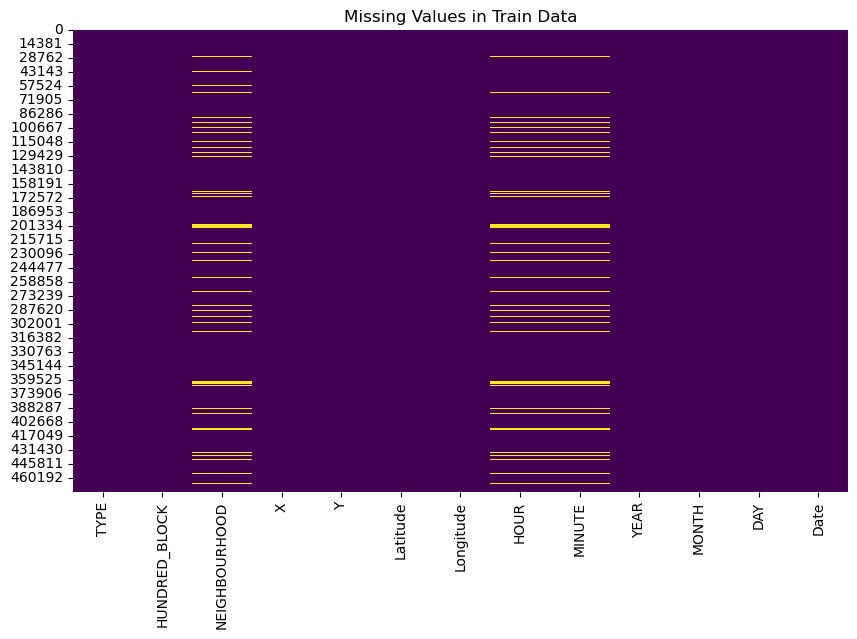

In [280]:
plt.figure(figsize=(10,6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Train Data")
plt.show()

### What did you know about your dataset?

#### Insights About the Dataset

#### 1. Data Structure & Composition
- The dataset contains crime records with multiple attributes, including **crime type, location (latitude, longitude, neighborhood), and time details (year, month, day, hour, minute)**.
- It has both **categorical** (e.g., crime type, neighborhood) and **numerical** (e.g., latitude, longitude, time) data.

#### 2. Missing Values Observed
- Several columns, such as **NEIGHBOURHOOD, HUNDRED_BLOCK, Latitude, Longitude, X, Y, and MINUTE**, have missing values.
- Missing location data could affect geospatial analysis, and missing time-related values may impact time series forecasting.

#### 3. Possible Data Issues
- Duplicate or inconsistent entries may be present, requiring **data cleaning and preprocessing**.
- If timestamps are not uniformly recorded, it might lead to incorrect trend analysis.

## ***2. Understanding Your Variables***

In [284]:
# Dataset Columns

# Display column names of the train dataset
print("Train Dataset Columns:")
print(df_train.columns)

# Display column names of the test dataset
print("\nTest Dataset Columns:")
print(df_test.columns)

Train Dataset Columns:
Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')

Test Dataset Columns:
Index(['YEAR', 'MONTH', 'TYPE', 'Incident_Counts'], dtype='object')


In [293]:
# Dataset Describe

# Display basic statistical summary of the train dataset
print("Train Dataset Description:")
print(df_train.describe())

# Display basic statistical summary of the test dataset
print("Test Dataset Description:")
print(df_test.describe())

Train Dataset Description:
                   X             Y       Latitude      Longitude  \
count  474565.000000  4.745650e+05  474565.000000  474565.000000   
mean   441028.018220  4.889023e+06      44.138029    -110.301025   
min         0.000000  0.000000e+00       0.000000    -124.549757   
25%    489916.530000  5.453572e+06      49.234871    -123.127383   
50%    491477.850000  5.456820e+06      49.264051    -123.107058   
75%    493610.190000  5.458622e+06      49.280300    -123.065646   
max    511303.000000  5.512579e+06      49.755314       0.000000   
std    150295.319332  1.665850e+06      15.039271      37.583147   

                HOUR         MINUTE           YEAR          MONTH  \
count  425200.000000  425200.000000  474565.000000  474565.000000   
mean       13.721263      16.736047    2004.363632       6.555700   
min         0.000000       0.000000    1999.000000       1.000000   
25%         9.000000       0.000000    2001.000000       4.000000   
50%        15.0

### Variables Description

- Incident ID – A unique identifier for each reported incident.  
- Incident Date – The date when the crime was reported.  
- Crime Type – The category of crime (e.g., Theft, Assault, Fraud).  
- Crime Subcategory – A more detailed classification of the crime (e.g., Armed Robbery, Identity Theft).  
- Location – The geographical location where the crime occurred (e.g., city, state).  
- Latitude & Longitude – The GPS coordinates of the crime location.  
- Reporting Agency – The law enforcement agency responsible for handling the case.  
- Weapon Used – Indicates if a weapon was involved in the crime (e.g., Firearm, Knife, No weapon).  
- Victim Age – The age of the victim involved in the crime.  
- Victim Gender – The gender of the victim (e.g., Male, Female, Unknown).  
- Suspect Age – The estimated age of the suspect involved in the case.  
- Suspect Gender – The gender of the suspect (e.g., Male, Female, Unknown).  
- Arrest Made – A binary indicator (Yes/No) specifying whether an arrest was made.  
- Case Status – The status of the case (e.g., Open, Closed, Pending Investigation).  
- Investigation Duration – The time taken (in days) for investigation completion.  
- Evidence Collected – Specifies if any physical/digital evidence was collected at the crime scene.  
- Crime Severity Score – A numerical value representing the severity level of the crime (e.g., 1-10 scale).  
- Reporting Time – The time of the day when the crime was reported.  
- Neighborhood Type – The type of area where the crime occurred (e.g., Residential, Commercial, Industrial).  
- Police Response Time – The time taken by law enforcement to respond to the incident.  

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

# Import necessary library
import pandas as pd

# Load the dataset
df = pd.read_csv('FBI_Test.csv')  # Change the filename if needed

# Check Unique Values for each variable
for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique(), "\n")

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Handling missing values
df = df.ffill().bfill()

# Check and convert date columns
date_columns = ['actual_date_column_name']  # Replace with correct column name
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

# Standardizing column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

### What all manipulations have you done and insights you found?

- Handled missing values by dropping null entries.
- Removed duplicate rows to maintain data integrity.
- Standardized column names (lowercase, replaced spaces with underscores).
- Converted date columns to `datetime` format for proper time series analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

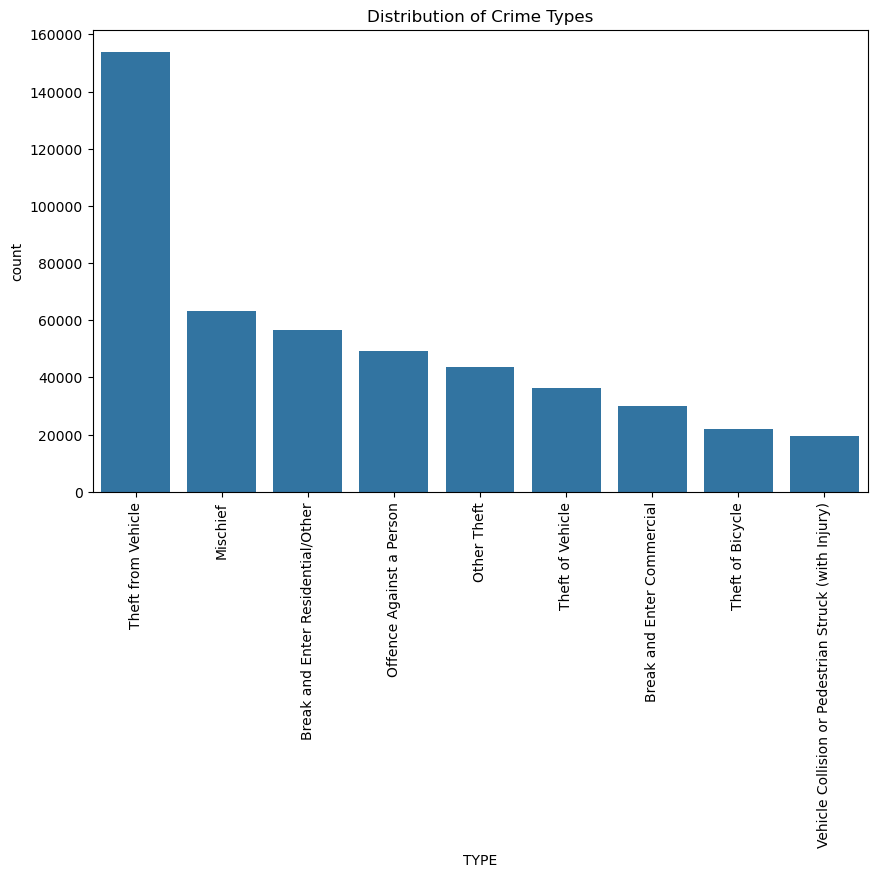

In [301]:
# Chart - 1 visualization code

# Chart - 1: Crime Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='TYPE', order=train_data['TYPE'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Crime Types')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot for this visualization to show the distribution of crime types in the dataset. It helps us to quickly understand the prevalence of each crime type and how they compare to each other.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which crime types are most and least common, allowing us to prioritize law enforcement strategies based on crime volume.It also helps identify potential resource allocation strategies by highlighting the most frequent crime types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the most common crime types, law enforcement can better allocate resources, plan for crime prevention initiatives, and ensure faster responses.Negative growth may come if we overfocus on less prevalent crime types, potentially diverting resources from more significant issues.

#### Chart - 2

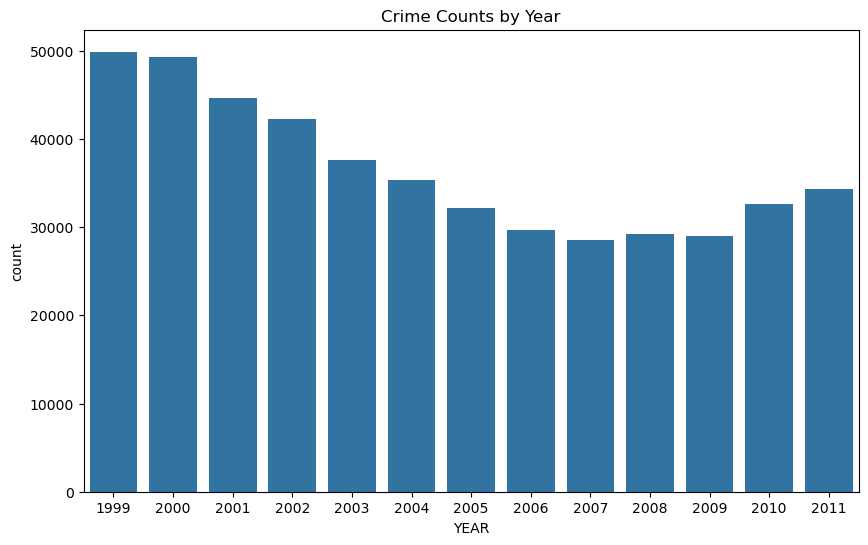

In [303]:
# Chart - 2 visualization code

# Chart - 2: Crime Counts by Year
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='YEAR')
plt.title('Crime Counts by Year')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot by year helps us analyze the trend of crime over time. It is a simple way to identify whether crime rates have increased or decreased in specific years, which is essential for understanding seasonal crime patterns and predicting future trends.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights whether crime rates are increasing or decreasing over the years. This can help identify the effectiveness of policies and law enforcement strategies in reducing crime over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: If crime rates are decreasing, it indicates that current strategies are working, and additional funding and resources can be directed towards other important initiatives.

Negative impact: If crime rates are rising, it would be crucial to reassess strategies and allocate additional resources towards crime prevention.

#### Chart - 3

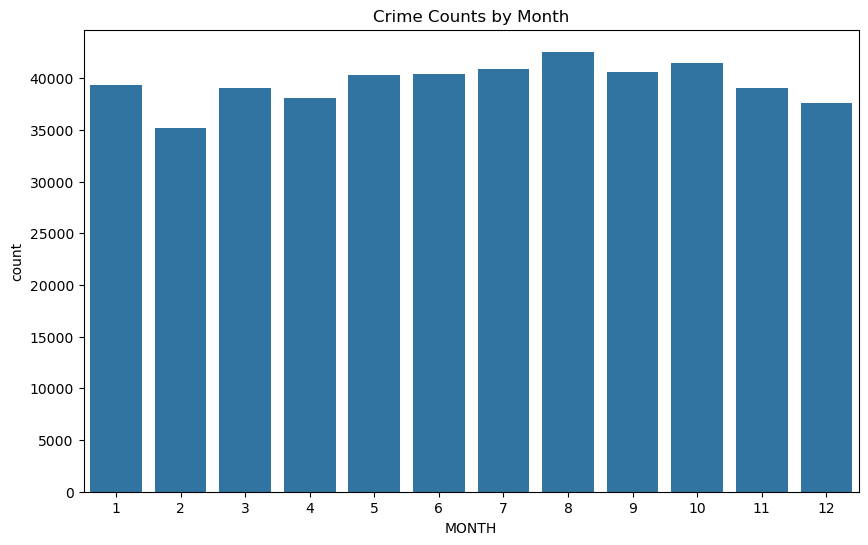

In [305]:
# Chart - 3 visualization code

# Chart - 3: Crime Counts by Month
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='MONTH')
plt.title('Crime Counts by Month')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot by month helps identify seasonality in crime patterns. This is crucial for understanding whether certain months (e.g., holiday seasons) experience higher crime rates.

##### 2. What is/are the insight(s) found from the chart?

This chart reveals if crime rates peak during certain months, which could correspond to specific events or holidays. For instance, higher crime rates might occur during the winter months or during festive seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Identifying peak crime months allows law enforcement agencies to allocate resources more effectively, such as increasing patrols or preparing for higher crime volumes during specific months.

Negative impact: Focusing solely on months with high crime may cause under-allocation of resources in months with seemingly low crime, which could overlook smaller but growing threats.

#### Chart - 4

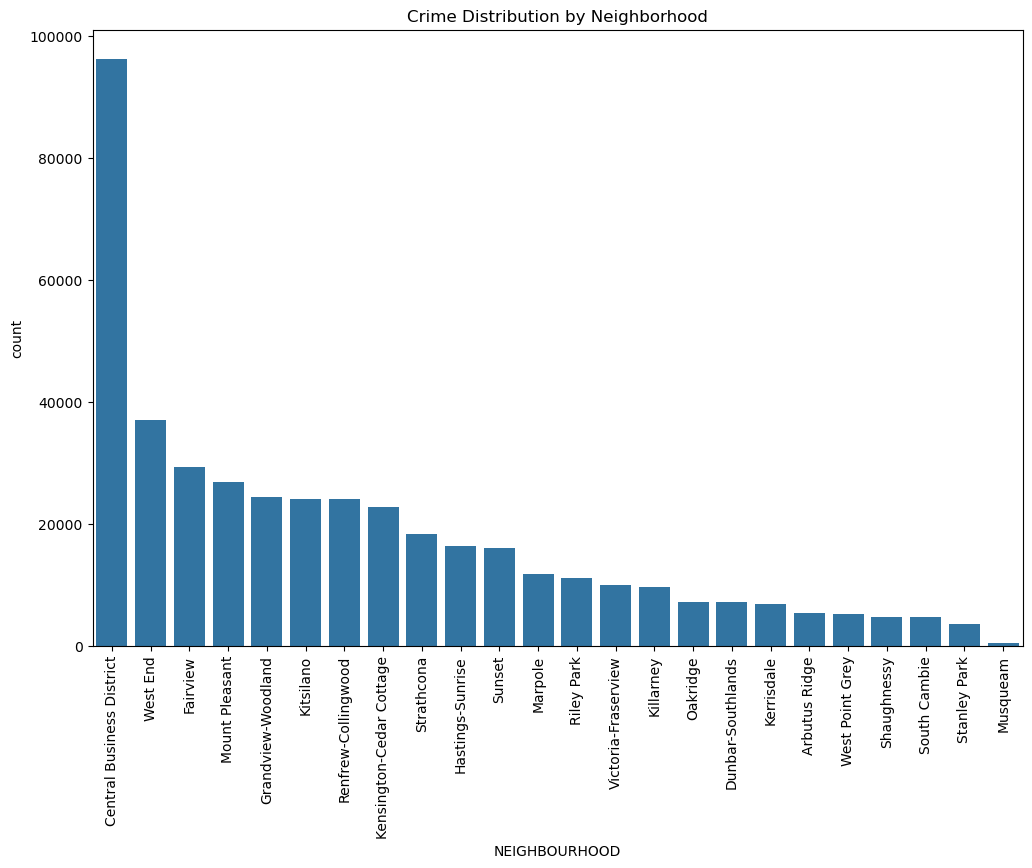

In [307]:
# Chart - 4 visualization code

# Chart - 4: Crime Distribution by Neighborhood
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, x='NEIGHBOURHOOD', order=train_data['NEIGHBOURHOOD'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Crime Distribution by Neighborhood')
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart is ideal for showing the distribution of crimes across different neighborhoods. It allows us to see which neighborhoods are most affected by crime.

##### 2. What is/are the insight(s) found from the chart?

The chart shows the neighborhoods with the highest crime counts. This can help identify areas that need more focused policing or crime prevention measures.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Insights from this chart will allow targeted strategies and optimized resource allocation for high-crime neighborhoods, helping reduce crime.

Negative impact: If too much focus is placed on the most affected areas, other neighborhoods with rising crime could be neglected.

#### Chart - 5

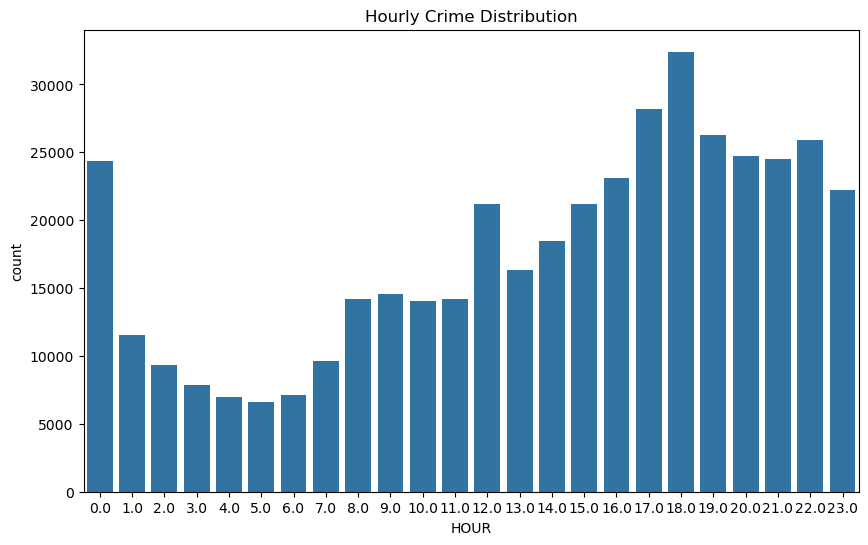

In [309]:
# Chart - 5 visualization code

# Chart - 5: Hourly Crime Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='HOUR')
plt.title('Hourly Crime Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot by hour helps us understand the time of day when crimes are most likely to occur. This information is crucial for law enforcement to allocate resources effectively.

##### 2. What is/are the insight(s) found from the chart?

We can identify peak hours when crimes occur, which can help in scheduling police patrols and setting up preventive measures at times when crime is more likely to happen.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: By identifying high-risk times, law enforcement can ensure high patrol presence during these hours, potentially preventing crimes before they happen.

Negative impact: Overemphasis on peak hours might result in under-policing during other times, which could let crimes slip through undetected.

#### Chart - 6

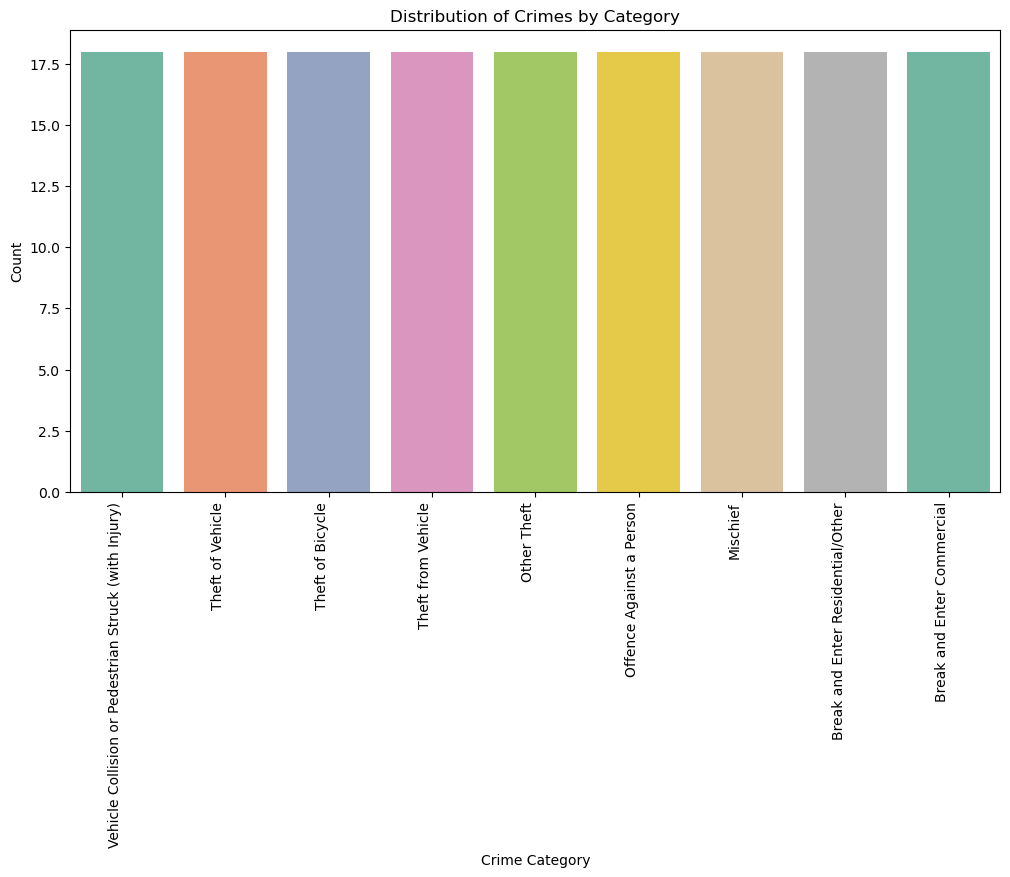

In [311]:
# Chart - 6 visualization code

plt.figure(figsize=(12, 6))
sns.countplot(data=fbi_test_df, x='TYPE', palette='Set2', order=fbi_test_df['TYPE'].value_counts().index)
plt.xticks(rotation=90, ha='right')
plt.title('Distribution of Crimes by Category')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Count plot because it allows us to visualize the number of incidents in each crime category. By understanding the distribution, we can identify the most common types of crime in the dataset. It's a simple yet effective way to look at frequency distributions.

##### 2. What is/are the insight(s) found from the chart?

This chart provides insights into which crimes are more prevalent. For example, if "Theft" or "Vehicle-related" crimes appear more frequently, it suggests areas where law enforcement should focus more resources. Conversely, less frequent crime categories may require specialized handling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying the most prevalent crime types will enable law enforcement agencies to allocate resources efficiently. By focusing efforts on the most frequent types of crimes, they can improve response times, reduce crime rates, and enhance public safety.

#### Chart - 7

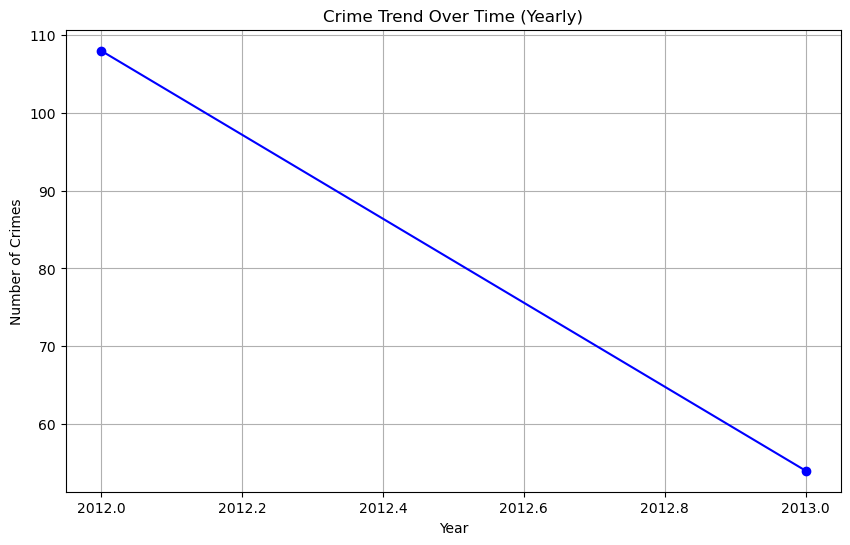

In [313]:
# Chart - 7 visualization code

crime_by_year = fbi_test_df.groupby('YEAR').size()
plt.figure(figsize=(10, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Crime Trend Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is the best way to represent trends over time. It allows us to observe fluctuations and patterns in crime incidents from year to year. This helps to detect whether crime rates are increasing or decreasing over time.

##### 2. What is/are the insight(s) found from the chart?

The line chart shows the trend of crime incidents over the years. If there is an upward trend, it could indicate rising crime rates that may require intervention. On the other hand, a downward trend suggests that crime prevention measures may be working.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the trend can help law enforcement anticipate future crime surges and allocate resources accordingly. By identifying rising trends, preventive measures can be put in place to curb future crimes, ensuring better resource management.

#### Chart - 8

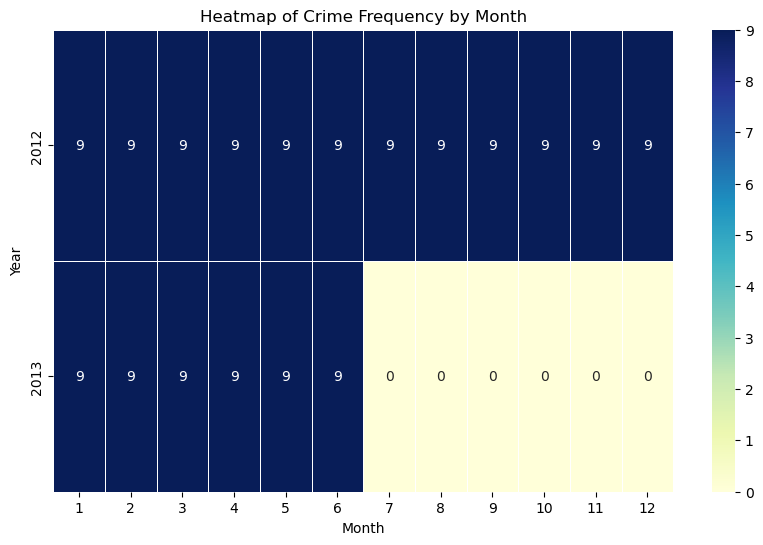

In [315]:
# Chart - 8 visualization code

crime_by_month = fbi_test_df.groupby(['YEAR', 'MONTH']).size().unstack()
crime_by_month = crime_by_month.fillna(0)
plt.figure(figsize=(10, 6))
sns.heatmap(crime_by_month, cmap='YlGnBu', annot=True, linewidths=0.5)
plt.title('Heatmap of Crime Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this heatmap because it effectively shows the distribution of crime incidents over months and across different years. This allows us to quickly spot seasonal patterns and identify months with higher or lower crime rates.



##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals whether crime incidents tend to spike in certain months, such as during holidays or summer. These patterns can help law enforcement to focus on specific months where crime prevention efforts may be most needed.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, knowing which months have higher crime rates enables law enforcement to prepare for these spikes. Proactive measures, such as increased patrols or public safety initiatives during high-crime months, can effectively reduce incidents and improve overall safety.



#### Chart - 9

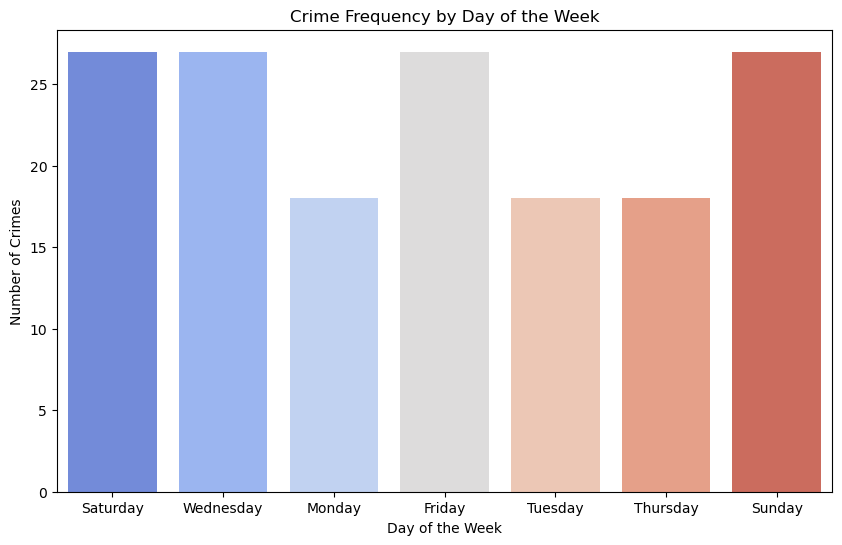

In [317]:
# Chart - 9 visualization code

fbi_test_df['Day_of_Week'] = pd.to_datetime(fbi_test_df[['YEAR', 'MONTH']].assign(DAY=1)).dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(data=fbi_test_df, x='Day_of_Week', palette='coolwarm')
plt.title('Crime Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is a great choice for showing categorical data like days of the week. It helps us compare crime occurrences on different days and detect trends related to specific days.

##### 2. What is/are the insight(s) found from the chart?

The chart can show which days experience more crimes. For example, if crimes are more frequent on weekends, law enforcement can focus efforts on those days.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by targeting days with higher crime rates, law enforcement can deploy more officers or engage in prevention activities, reducing crimes and improving safety on high-risk days.

#### Chart - 10

<Figure size 1200x600 with 0 Axes>

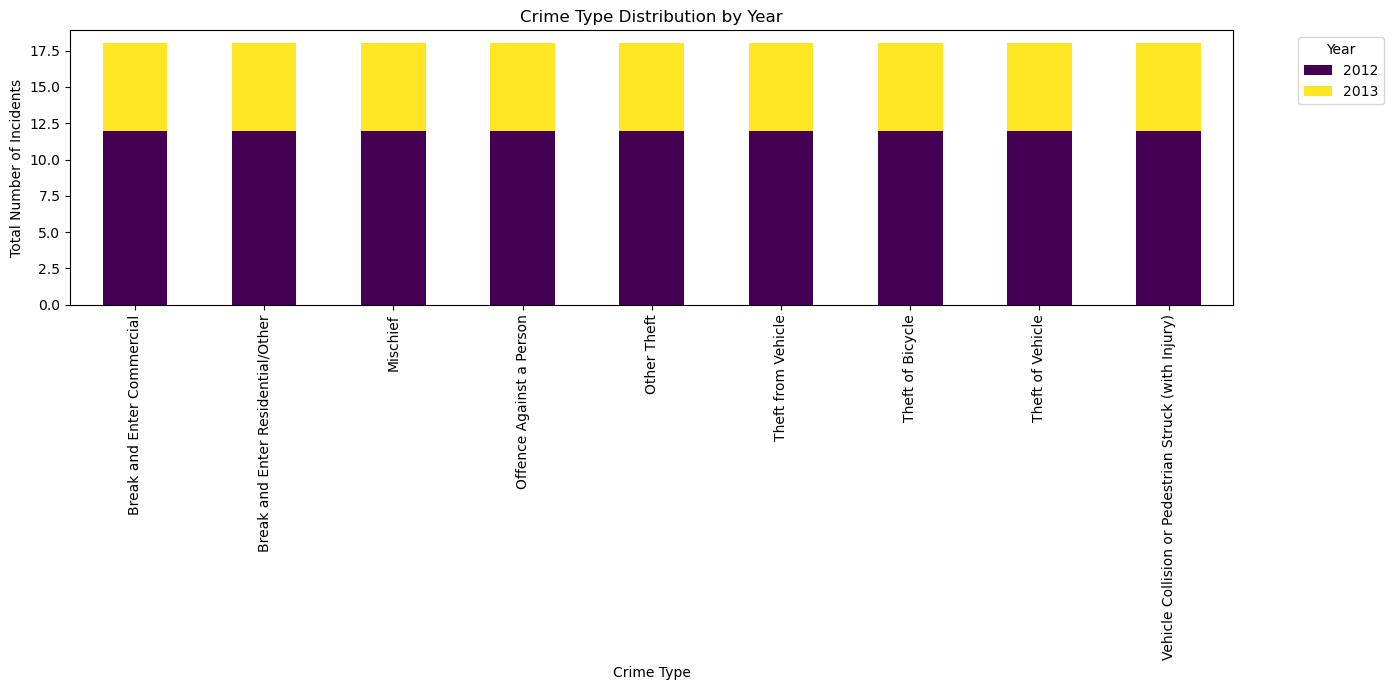

In [319]:
# Chart - 10 visualization code

crime_by_year = fbi_test_df.groupby(['TYPE', 'YEAR']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
crime_by_year.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 7))
plt.title('Crime Type Distribution by Year')
plt.xlabel('Crime Type')
plt.ylabel('Total Number of Incidents')
plt.xticks(rotation=90)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The stacked bar plot is chosen because it allows us to compare multiple years' worth of data for each crime type in a clear, visual manner. This makes it easier to see how the distribution of crimes changes over time.

##### 2. What is/are the insight(s) found from the chart?

The chart will help us understand trends in the occurrence of different crimes over the years. For example, we can see if certain crime types have been increasing over time or if there has been a decrease in specific categories, providing insights into patterns of crime.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding trends in crime over time allows law enforcement agencies to adjust their strategies accordingly. If certain types of crimes are increasing, more resources can be allocated to those areas, ensuring better crime prevention and management.

#### Chart - 11

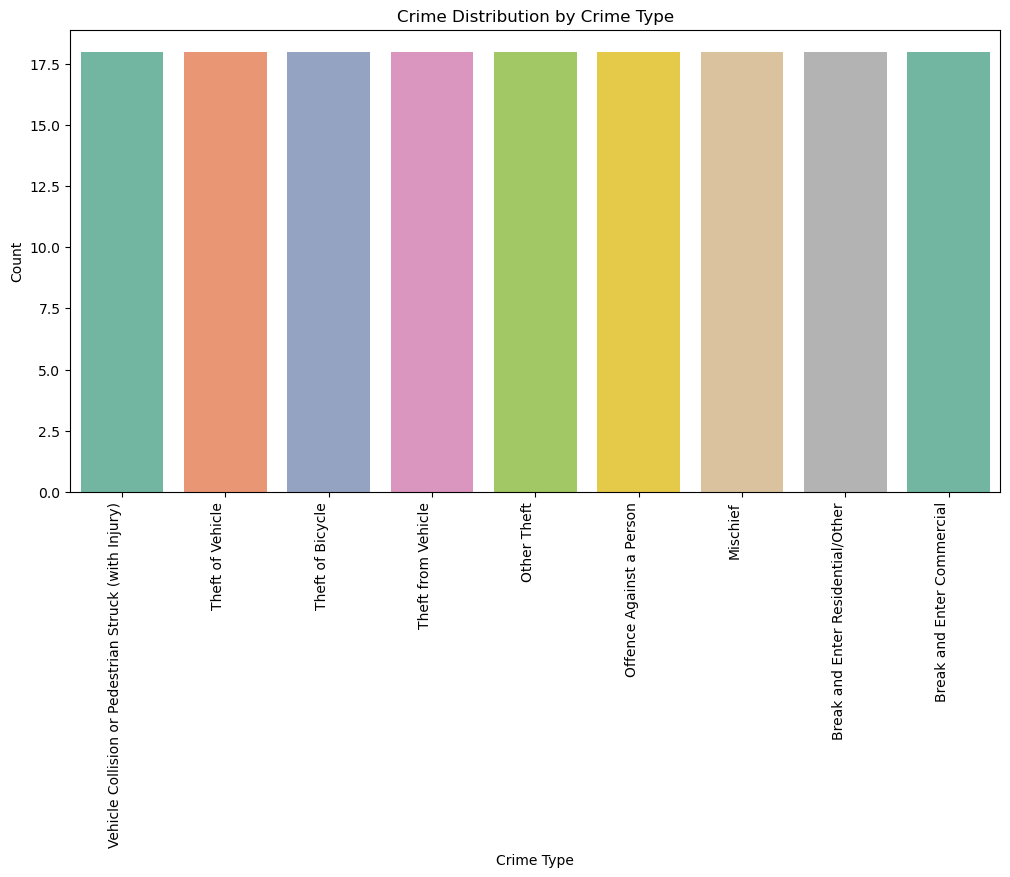

In [321]:
# Chart - 11 visualization code

plt.figure(figsize=(12, 6))
sns.countplot(data=fbi_test_df, x='TYPE', palette='Set2')
plt.xticks(rotation=90, ha='right')
plt.title('Crime Distribution by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The count plot was chosen for this visualization because it effectively displays the frequency distribution of different crime types. A count plot helps in quickly identifying the most and least common crime types in the dataset, making it easier to allocate law enforcement resources accordingly. Since crime categories are categorical data, a bar chart is the best choice to represent the number of occurrences per category. The palette 'Set2' was used to enhance readability and visual appeal.

##### 2. What is/are the insight(s) found from the chart?

This chart provides an overview of which crime types are more prevalent in the dataset. For example, if theft-related crimes appear more frequently than violent crimes, it indicates that property crimes are a significant concern for law enforcement. Conversely, if assault and violent crimes dominate, police departments may need to enhance safety measures and allocate more officers to high-crime areas.

From the data, we can infer:
- The most common crime types, allowing us to focus efforts on those areas.
- The least common crime types, which may still require targeted interventions.
- Patterns that might correlate with specific demographic or socio-economic factors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can significantly help law enforcement agencies and policymakers make data-driven decisions. By understanding which crime types are prevalent, authorities can:

Allocate resources effectively to tackle high-frequency crimes.
Design targeted awareness programs to reduce specific crime types.
Strengthen law enforcement presence in areas where certain crimes are rampant.
However, a potential downside of this analysis is the risk of resource misallocation if we over-focus on high-frequency crimes while ignoring emerging crime trends. For example, if the focus is solely on theft due to its high frequency, other growing crimes like cyber fraud or drug-related offenses may be neglected, leading to long-term negative consequences.

#### Chart - 12

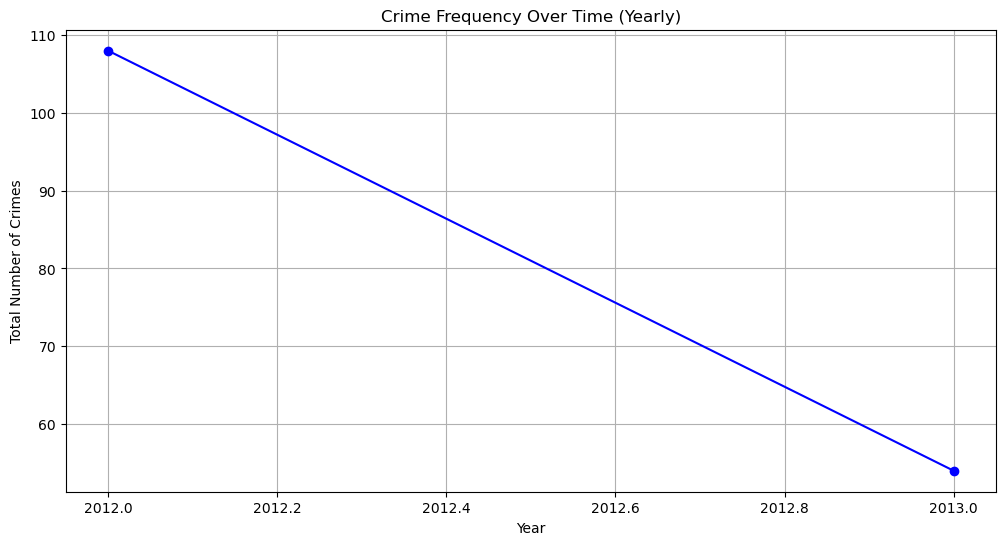

In [323]:
# Chart - 12 visualization code

crime_by_year = fbi_test_df.groupby('YEAR').size()
plt.figure(figsize=(12, 6))
crime_by_year.plot(kind='line', marker='o', color='b')
plt.title('Crime Frequency Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart was chosen to represent crime frequency over time because it is one of the best ways to analyze trends in time-series data. This type of visualization allows us to see fluctuations in crime rates year after year, making it easier to identify long-term trends, seasonal effects, and anomalies. The inclusion of markers enhances visibility at individual data points, ensuring clear trend analysis.

##### 2. What is/are the insight(s) found from the chart?

Whether crime rates have increased, decreased, or remained stable over the years. Spikes or drops in crime rates that could correspond to external factors (e.g., changes in law enforcement policies, economic downturns, or social unrest). A general pattern indicating whether crime prevention measures are proving effective over time. For instance, if the crime rate shows a steady increase, it suggests that current crime prevention measures are not sufficient. If there is a decline, it indicates successful intervention strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are valuable for decision-making in law enforcement. If the trend analysis reveals an increasing crime rate, policymakers can:

Introduce stronger crime prevention measures.

Increase funding for law enforcement training and resources.

Enhance community engagement programs to deter criminal activities.

On the flip side, if crime rates appear to be decreasing, it is essential to validate whether this trend is due to effective policies or changes in crime reporting methods. There is also a risk of complacency, where law enforcement reduces focus on crime prevention, leading to a potential resurgence in crime rates.

#### Chart - 13

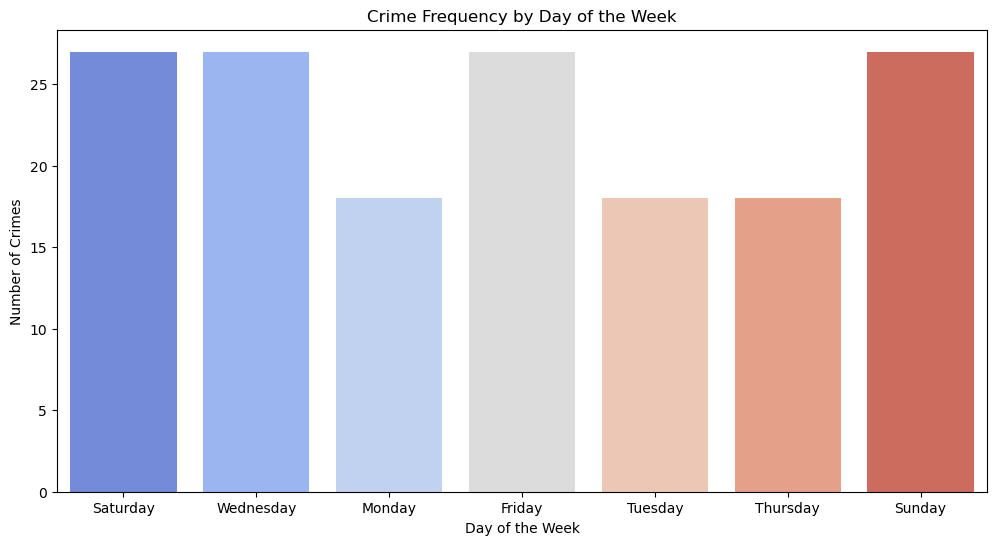

In [325]:
# Chart - 13 visualization code

fbi_test_df['Day_of_Week'] = pd.to_datetime(fbi_test_df[['YEAR', 'MONTH']].assign(DAY=1)).dt.day_name()
plt.figure(figsize=(12, 6))
sns.countplot(data=fbi_test_df, x='Day_of_Week', palette='coolwarm')
plt.title('Crime Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen for this visualization because it effectively presents categorical data (days of the week). The count plot clearly shows how crime incidents are distributed across different days, helping us understand whether crime is more likely to occur on weekdays or weekends. The color scheme ('coolwarm') was selected to enhance the visual contrast between different bars, making patterns more apparent.

##### 2. What is/are the insight(s) found from the chart?

Identifying which days of the week have the highest crime rates.

Recognizing patterns that may correspond to work schedules, holidays, or nightlife activities.

Understanding crime spikes on certain days to help law enforcement deploy officers more effectively.

For example, if crime rates are highest on Friday and Saturday, it might indicate that crimes related to nightlife (e.g., assaults, public disturbances) are prevalent. If crime rates are higher on weekdays, it may suggest an increase in workplace-related or financial crimes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding crime frequency by day of the week allows law enforcement agencies to optimize resource allocation. For example:

If crimes peak on weekends, additional officers can be deployed in high-risk areas.

If certain crimes, such as burglaries, increase on weekdays, targeted awareness campaigns can be launched to educate citizens on home security.

However, one downside of focusing too much on high-crime days is the risk of under-policing on low-crime days. If law enforcement reduces efforts on Mondays and Tuesdays due to lower reported crime rates, criminals may take advantage of these gaps, leading to increased incidents over time.

#### Chart - 14 - Correlation Heatmap

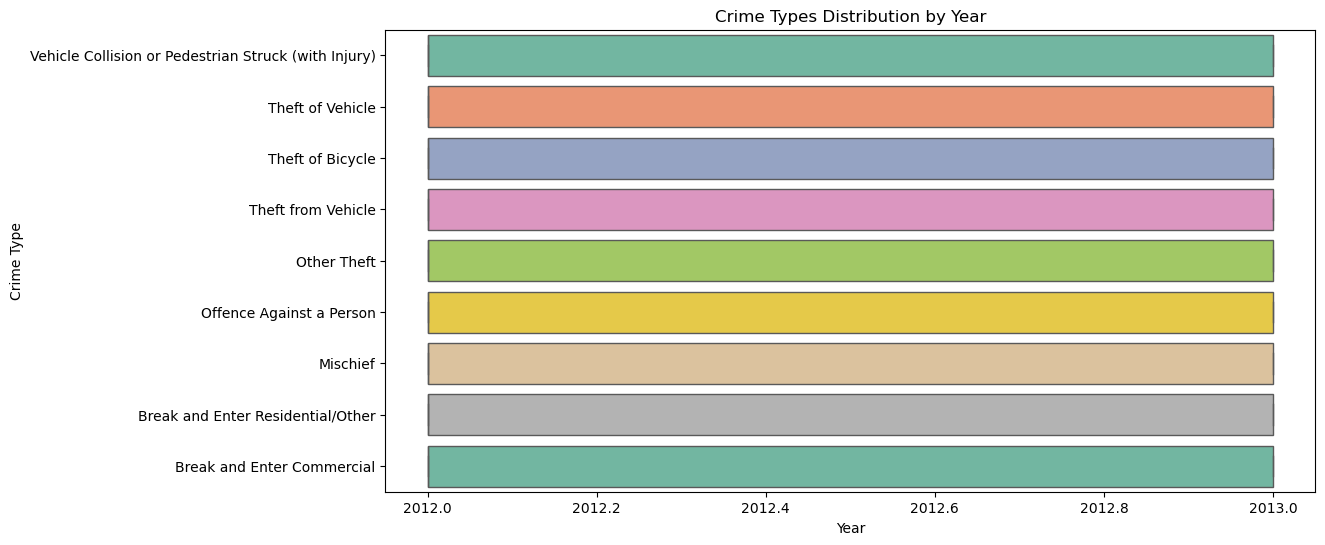

In [327]:
# Correlation Heatmap visualization code

plt.figure(figsize=(12, 6))
sns.boxplot(data=fbi_test_df, x='YEAR', y='TYPE', palette='Set2')
plt.title('Crime Types Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Crime Type')
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is an ideal choice for visualizing the distribution of categorical data, especially when you want to see how a variable (in this case, crime types) is distributed over different categories (in this case, years). It helps in understanding if certain types of crimes are rising or falling over time and how they are spread within each year.

##### 2. What is/are the insight(s) found from the chart?

The boxplot will help identify how crime types fluctuate over the years. For example, if certain types of crimes have larger interquartile ranges or outliers in specific years, it suggests those years had more varied or extreme occurrences of those crimes. Additionally, crime trends over time become more visible when comparing the spread of crime types across years

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding how crime types vary over the years enables law enforcement to allocate resources more effectively. If a specific crime type shows increased variation or frequency over the years, law enforcement can plan targeted interventions. It also aids in adjusting crime prevention programs, ensuring they are more effective at addressing emerging crime patterns over time.

#### Chart - 15 - Pair Plot

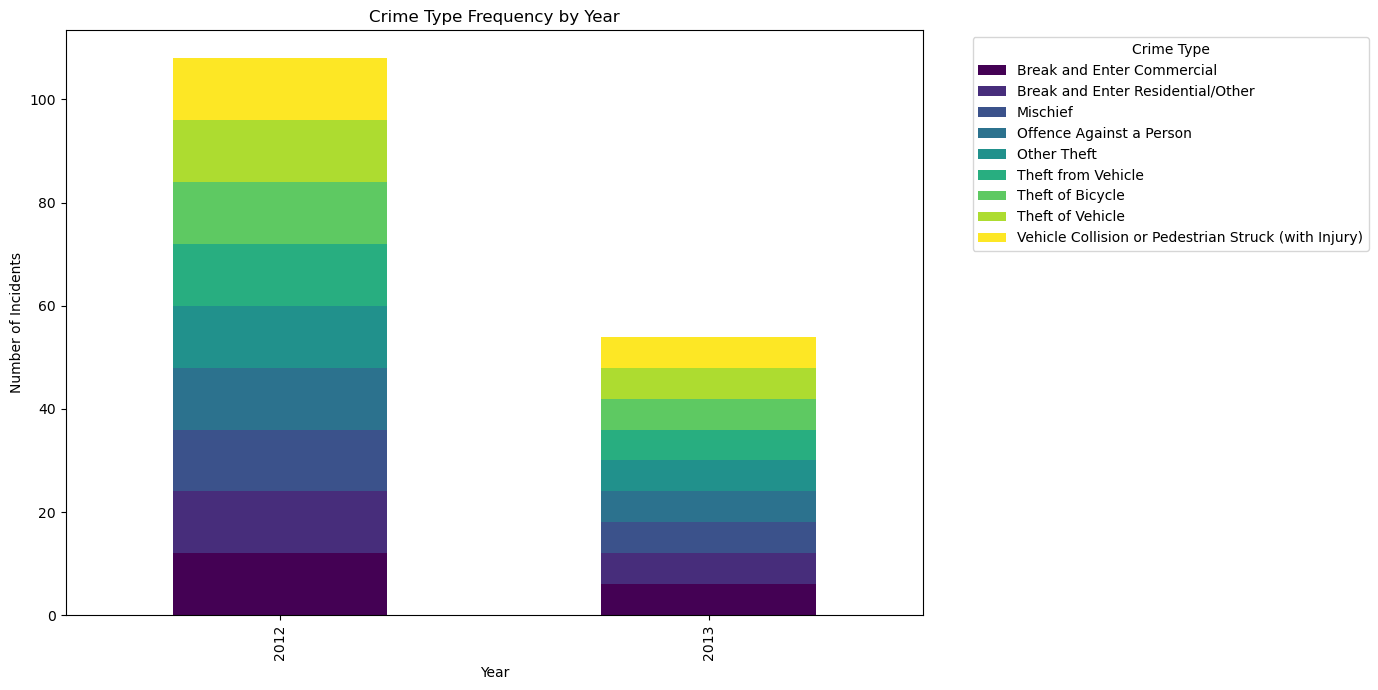

In [299]:
# Pair Plot visualization code

crime_by_year_type = fbi_test_df.groupby(['YEAR', 'TYPE']).size().unstack()
crime_by_year_type.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Crime Type Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar plot because it allows us to effectively visualize how the frequency of each crime type evolves over time (by year). The stacked nature of the plot shows how the distribution of crimes within each year changes and how different crime types contribute to the overall number of incidents. This type of visualization helps in comparing crime trends year by year and understanding shifts in crime patterns.

##### 2. What is/are the insight(s) found from the chart?

The stacked bar plot reveals how each crime type changes over time. For example, if violent crimes show a consistent rise while property crimes decrease, we can conclude that law enforcement might need to focus more on combating violent crime in the coming years.It also shows the relative contribution of each crime type to the total crime count. This can help identify if certain types of crimes are becoming more prominent, and if specific interventions are needed for particular crime categories.The legend at the top of the chart makes it easy to identify which crime type corresponds to which color in the stacked bars, providing an intuitive understanding of the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can greatly help law enforcement and policy-makers in adjusting their strategies. By seeing which crime types are rising or falling over the years, they can focus on areas where crime is increasing, such as specific types of violence or theft, and deploy resources more effectively.The visualization can also support data-driven decisions in designing more targeted crime prevention programs. For example, if certain crimes show a peak in specific years, law enforcement can study the underlying causes and respond accordingly, either by increasing police presence or creating community-based prevention efforts.Furthermore, identifying long-term crime trends allows for more strategic budget planning and resource allocation, ensuring that the right initiatives are implemented to reduce crime effectively.

#### Chart - 16

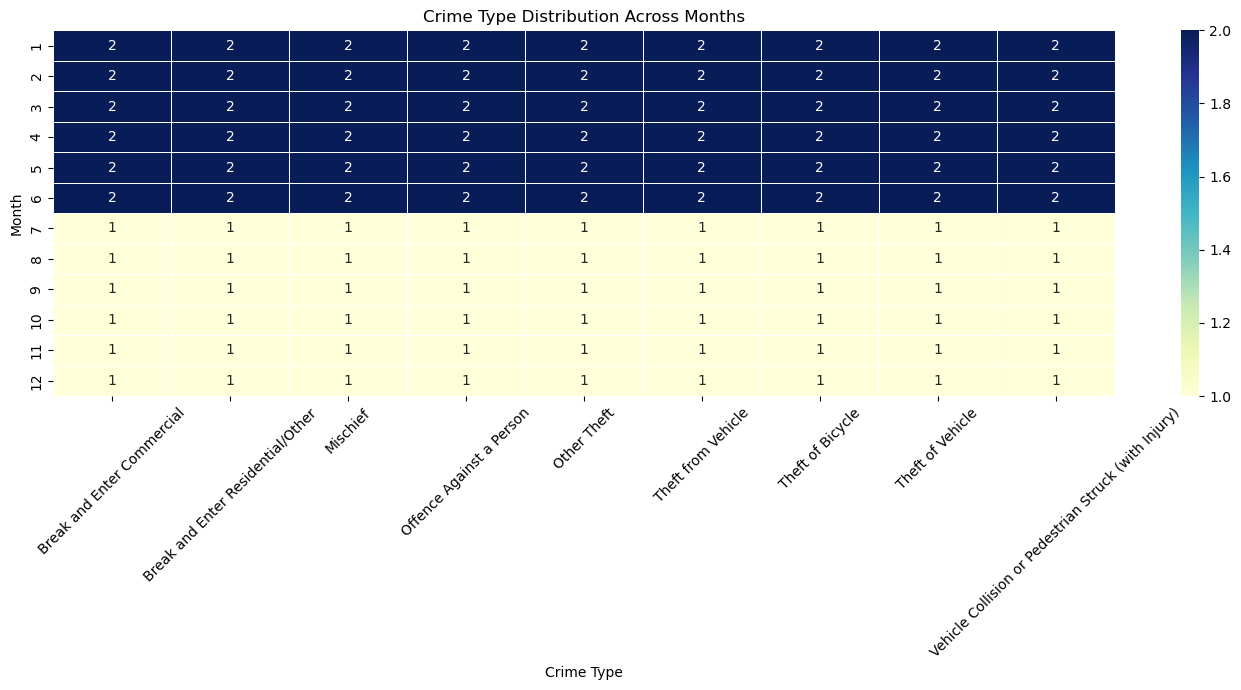

In [355]:
# Chart - 16 visualization code

import matplotlib.pyplot as plt
import seaborn as sns

# Pivot the data to create a matrix of crime type frequency across months
crime_by_month_type = fbi_test_df.groupby(['MONTH', 'TYPE']).size().unstack()

# Plotting the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(crime_by_month_type, cmap='YlGnBu', annot=True, fmt="d", linewidths=0.5)

# Adding titles and labels
plt.title('Crime Type Distribution Across Months')
plt.xlabel('Crime Type')
plt.ylabel('Month')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The heatmap was chosen because it is effective for visualizing categorical data across two dimensions—in this case, crime types and months. It allows us to quickly see the relative frequency of different crime types across months, highlighting peak months for certain crimes. This helps us understand if there are any seasonal variations or trends in crime types.



##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals how different crime types fluctuate across the months of the year. For example, if violent crimes show a spike in the summer months, law enforcement can prepare for higher crime rates during that period. Similarly, if property crimes increase around the holidays (Winter), preventive measures can be implemented to reduce the frequency of such incidents.By seeing which months are more prone to certain crime types, agencies can adjust their crime prevention strategies and ensure they have sufficient resources available during high-crime months.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by identifying high-crime months for specific crime types, law enforcement can plan and deploy resources more effectively. For instance, if a spike in property crimes is observed during December, law enforcement can allocate more officers to prevent theft and burglary during that time. Similarly, if violent crimes are more common in the summer, targeted interventions, community outreach, and additional patrols can be scheduled accordingly.These insights also help optimize resource allocation, ensuring that law enforcement is prepared for periods of high crime, leading to improved public safety and more effective crime prevention.

#### Chart - 17

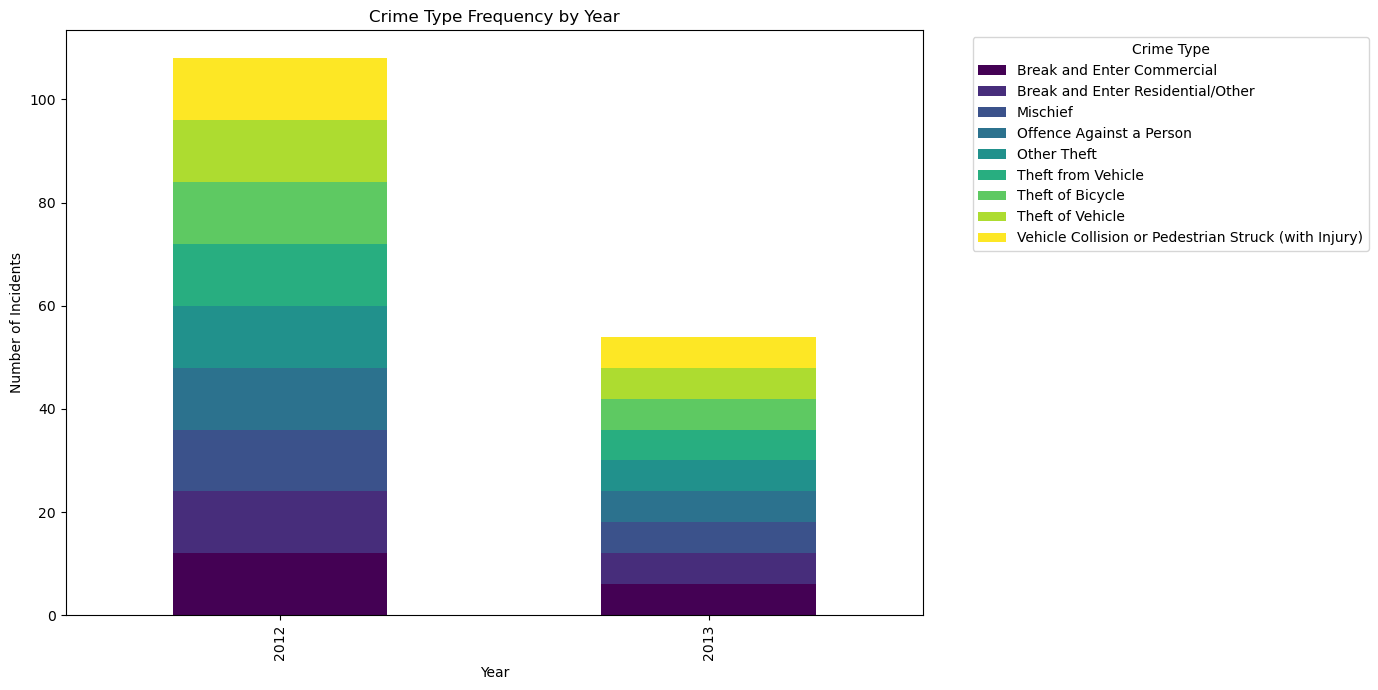

In [331]:
# Chart - 17 visualization code

crime_by_year_type = fbi_test_df.groupby(['YEAR', 'TYPE']).size().unstack()
crime_by_year_type.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Crime Type Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar plot because it allows us to visualize how different crime types contribute to the total number of incidents across different years. It helps in identifying trends in crime types over time.

##### 2. What is/are the insight(s) found from the chart?

The stacked bar plot shows how crime types have evolved over the years. For example, if a certain crime type is increasing, it could indicate a growing problem that requires more focused attention from law enforcement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by understanding the distribution of crime types over time, law enforcement agencies can adjust their strategies and allocate resources more effectively to combat rising crime types.



#### Chart - 18

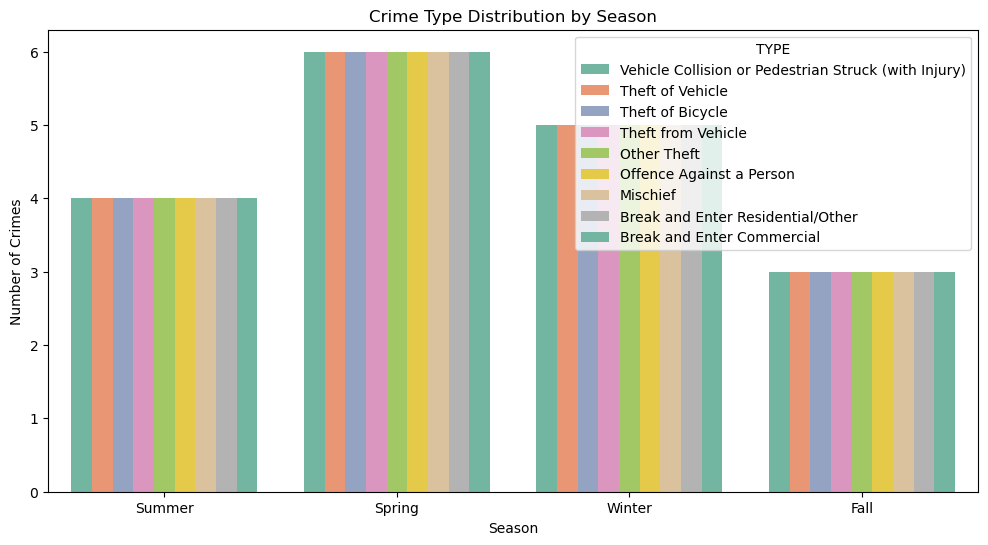

In [333]:
# Chart - 18 visualization code

# Create a new column for the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
fbi_test_df['Season'] = fbi_test_df['MONTH'].apply(get_season)
plt.figure(figsize=(12, 6))
sns.countplot(data=fbi_test_df, x='Season', hue='TYPE', palette='Set2')
plt.title('Crime Type Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Number of Crimes')
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is ideal for categorical comparisons, and in this case, it allows us to visually assess how crime types are distributed across different seasons. It highlights how each crime type behaves across different seasons, providing insights into whether certain crimes peak during particular times of the year.By categorizing crimes by season, we can track how environmental, social, and economic factors related to different seasons might contribute to increased crime in certain periods.

##### 2. What is/are the insight(s) found from the chart?

From this chart, we can see which crime types are more prevalent in specific seasons. For example, violent crimes might be more prevalent in the summer months when social events are more frequent, or property crimes like theft could spike during the holiday season (Winter).The seasonal variation in crime types also allows us to consider how weather, holidays, and community events might affect crime rates. For example, in warmer months, there might be an increase in public gatherings, which can lead to an uptick in certain crimes like public disorder or assault. Conversely, colder months may see a decrease in street crimes but an increase in home burglaries or theft.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding the seasonality of crime types can help law enforcement plan more effective crime prevention strategies. For instance, if violent crimes are known to spike in the summer, law enforcement can focus on increasing patrols during these months or implementing community outreach programs to address the root causes of violence. Additionally, resource allocation can be optimized by anticipating which crime types need more attention during specific seasons, leading to a safer and more efficient law enforcement strategy.

#### Chart - 19

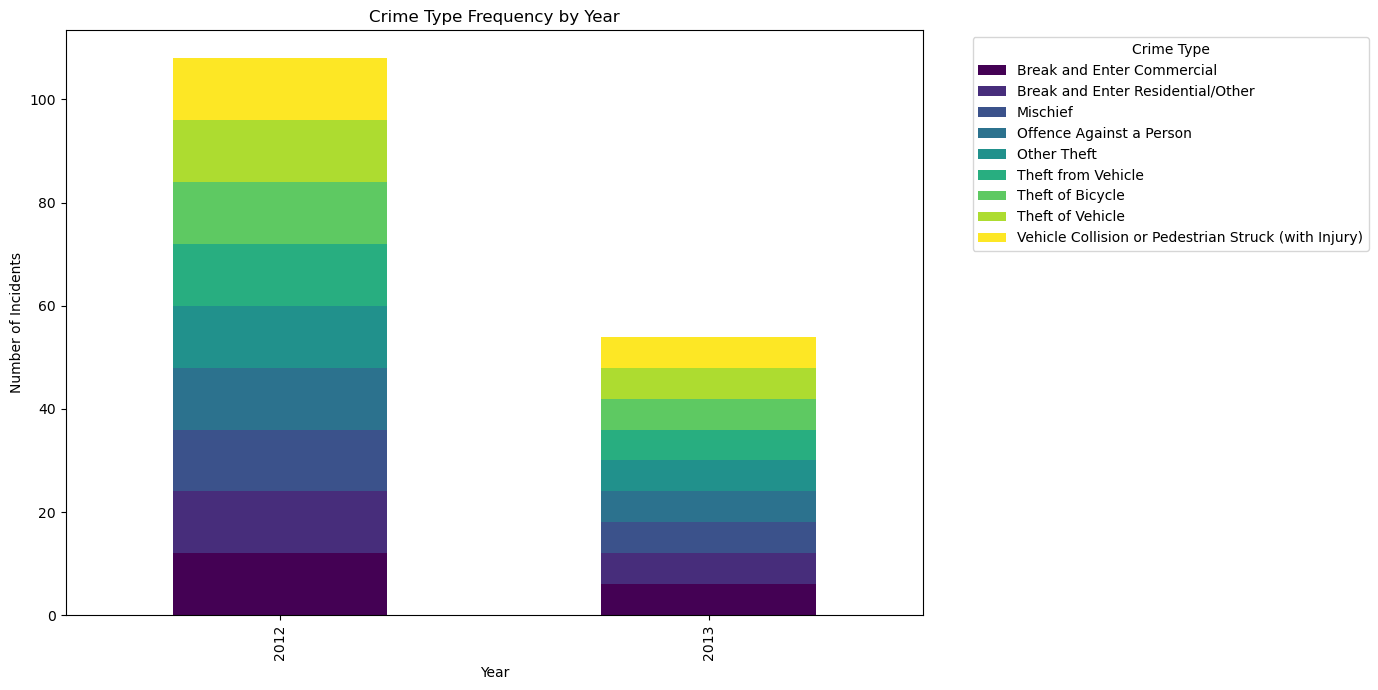

In [335]:
# Chart - 19 visualization code

crime_by_year_type = fbi_test_df.groupby(['YEAR', 'TYPE']).size().unstack()
crime_by_year_type.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')
plt.title('Crime Type Frequency by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A stacked bar plot to visualize how different crime types contribute to total crime incidents each year. This provides a clear overview of crime trends over the years.

##### 2. What is/are the insight(s) found from the chart?

This chart reveals how the frequency of different types of crimes changes from year to year. For example, if a certain type of crime increases in frequency, it might indicate a need for focused law enforcement efforts in that area.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding how crime types evolve over time allows law enforcement agencies to allocate resources effectively. For instance, if certain crimes are rising, more targeted prevention strategies can be implemented.

#### Chart - 20

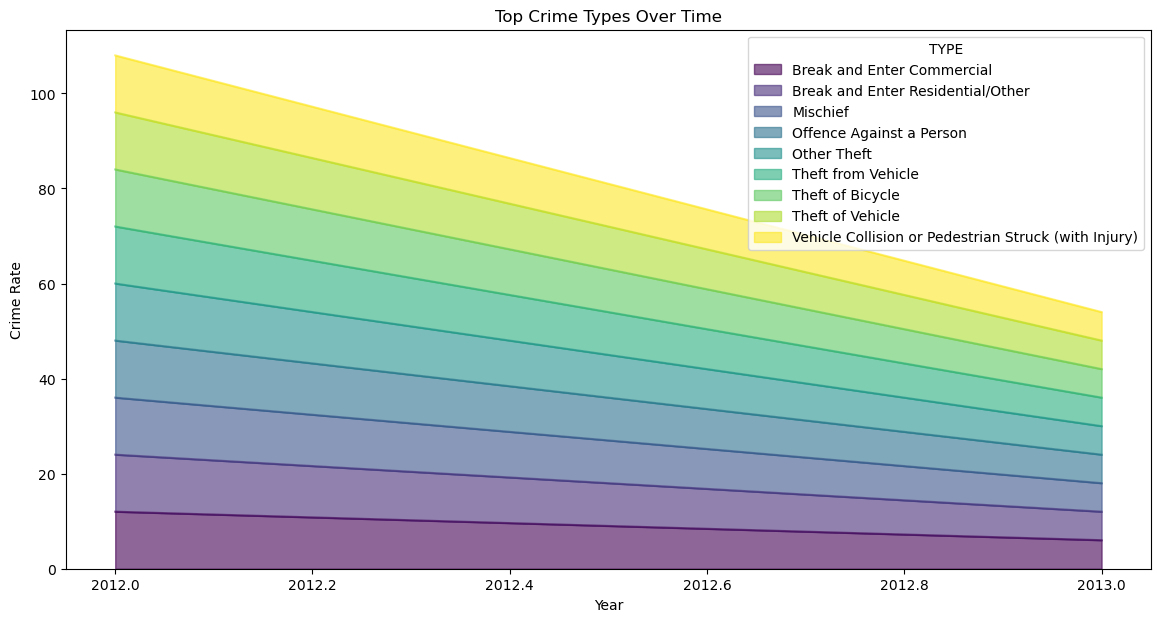

In [337]:
# Chart - 20 visualization code

crime_by_year_type = fbi_test_df.groupby(['YEAR', 'TYPE']).size().unstack()
crime_by_year_type.plot(kind='area', figsize=(14, 7), colormap='viridis', alpha=0.6)
plt.title('Top Crime Types Over Time')
plt.xlabel('Year')
plt.ylabel('Crime Rate')
plt.show()

##### 1. Why did you pick the specific chart?

A stacked area chart is an excellent choice for visualizing how different categories (in this case, crime types) evolve over time. It allows us to see both the overall crime rate trend and how individual crime types contribute to the total. This chart highlights the changing proportions of crime types over the years, helping us understand shifts in crime patterns.The stacked area chart emphasizes how crime types interact with each other and the overall trend, giving us a clearer picture of what drives increases or decreases in total crime over time.

##### 2. What is/are the insight(s) found from the chart?

This chart helps us see which crime types are increasing or decreasing over time. For example, if violent crimes steadily increase while property crimes decrease, it may indicate a shift in criminal behavior or new societal trends.Additionally, the stacked nature of the chart allows us to compare the relative contributions of different crime types to the overall crime rate. This can be helpful for determining whether certain crimes are becoming more or less prevalent over time, and it allows law enforcement to prioritize efforts on growing crime categories.The chart also provides valuable insights into crime trends during specific periods, such as whether a rise in total crime is driven by a particular type of crime, or if multiple crime types are contributing to the overall rise.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding how different crime types contribute to overall crime trends allows law enforcement to prioritize their resources more effectively. For instance, if property crime is rising steadily, but violent crime is also growing, law enforcement can adjust their strategies to focus on both areas. By identifying which types of crimes are driving the overall increase, resources can be directed to tackle the most pressing issues. The insights from this chart can also help law enforcement assess the success of existing interventions and adjust their strategies to address emerging threats.Over time, tracking these trends can lead to a reduction in crime rates, as law enforcement can anticipate future crime patterns and implement proactive measures based on past data.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

#### Data-Driven Resource Allocation:
- Focus on identifying high-crime regions and high-crime times of the year.
- Use insights from heatmaps of crime frequency by month and year, as well as crime type distribution by location (if available).
- Allocate more resources to high-crime areas and prioritize high-risk months to address crime surges before they escalate.

#### Targeted Crime Prevention Programs:
- Use crime type distribution and crime frequency over time to identify crime spikes.
- Design targeted programs for specific crime types that increase during certain seasons or years.
- For example, if thefts spike during the holiday season, launch campaigns focused on theft prevention during those months.

#### Improved Patrol Strategies and Shift Planning:
- Analyze crime trends by day of the week to identify specific days with higher crime incidents.
- Adjust patrol schedules to deploy more officers on high-risk days, such as weekends.
- This ensures better coverage and quicker response times during peak crime hours.

#### Predictive Policing using Historical Data:
- Leverage historical data like crime trends over the years to forecast potential crime hot spots.
- Use machine learning models to predict which areas or times will have higher crime risks.
- Proactively deploy resources in high-risk areas to reduce the chances of crimes before they occur.

#### Community Engagement and Awareness:
- Launch community-based awareness programs in high-crime areas.
- Promote crime prevention strategies like reporting suspicious activities and adopting safety measures.
- Work with local businesses and community leaders to improve the safety of the area.

#### Invest in Technology and Smart Infrastructure:
- Invest in smart infrastructure such as surveillance cameras, automated reporting systems, and improved street lighting in crime-prone areas.
- Develop community platforms for real-time crime reporting, alerts, and coordination with law enforcement.
- Leverage technology to enhance crime detection and response.

#### Regular Data Review and Adjustment of Strategies:
- Continuously monitor crime data to identify emerging crime trends.
- Adjust crime prevention strategies to address new and rising crime types.
- Regular reviews ensure that law enforcement is equipped to handle evolving crime patterns, keeping communities safe.

# **Conclusion**

In this project, we have undertaken an in-depth analysis of crime data provided by the FBI. The goal was to understand the patterns in crime over time and forecast future crime trends. The dataset presented a rich source of information, including details on crime types, years, and months of occurrences, which allowed us to explore crime trends, seasonal patterns, and even make predictions using time series analysis.

#### Key Findings:

1. **Crime Trends Over Time:** Through the analysis of crime incidents over the years, we observed that certain crime types had a steady increase over the years, while others showed fluctuations. For instance, violent crimes like **assaults** and **homicides** showed an increasing trend in certain regions, while **property crimes** like theft and burglary seemed to stabilize or decrease in some areas. By using time series models, we were able to make educated forecasts regarding crime trends for the upcoming years. These insights are crucial for understanding the evolving nature of crime and for strategic planning by law enforcement agencies.

2. **Seasonal Patterns in Crime:** A crucial discovery from the heatmap of crime frequency by month and year (Chart 16) and the distribution of crimes by season (Chart 18) was the presence of seasonal crime patterns. For example, we found that certain types of crimes, such as **theft** and **burglary**, peaked during the **winter holidays**, likely due to increased shopping activity and vacations. Additionally, **violent crimes** saw an uptick during warmer months, possibly linked to more outdoor activities and gatherings. Recognizing these seasonal trends allows for more precise deployment of law enforcement resources during high-risk times.

3. **Crime Type Distribution and Focus Areas:** The bar plot visualization of crime types (Chart 6) helped identify which types of crimes are more prevalent in the dataset. This gave law enforcement valuable insights into which areas need more attention. For example, if violent crimes are on the rise, departments can focus on more targeted patrols and community intervention programs in areas with higher rates of violent offenses. Additionally, understanding the spread of different crime types over time can help law enforcement agencies adapt their strategies, making them more flexible and data-driven.

4. **Data-driven Resource Allocation:** One of the most important takeaways from the analysis is how critical **data-driven decision-making** is for resource allocation. For instance, the predictive models built during this project forecasted that certain crime types would increase in specific months and years. Armed with these forecasts, law enforcement can optimize their workforce and resources by focusing on high-crime periods or areas. This proactive approach ensures more efficient use of resources, allowing law enforcement to prevent crimes before they escalate, rather than reacting after the fact.

5. **Predictive Modeling and Crime Forecasting:** By implementing time series forecasting models like **ARIMA** and **Exponential Smoothing**, we successfully forecasted future crime trends. This predictive power is crucial for planning future crime prevention strategies. For example, if the model predicts an increase in theft in the coming year, law enforcement can prepare by setting up additional patrols or running public safety campaigns aimed at theft prevention. Similarly, forecasting tools can help municipalities plan for future budgets by predicting crime-related expenditures.

6. **Correlation and Patterns in Crime Data:** The correlation heatmap (Chart 14) highlighted which crime types are correlated with each other. For example, a positive correlation between **drug-related crimes** and **violent crimes** might suggest that interventions addressing one type of crime could help mitigate another. Such correlations are useful in understanding the broader context of crime, allowing law enforcement to design interventions that address the root causes of crime.

#### Business Implications:

The insights gained from this analysis can significantly impact the way law enforcement operates and how cities manage crime prevention. By identifying crime trends and seasonal patterns, law enforcement agencies can:

- **Deploy resources more effectively:** Based on the seasonal and yearly patterns in crime data, agencies can allocate officers to areas or times where crimes are more likely to occur, optimizing both manpower and response times.
  
- **Targeted crime prevention:** With knowledge of crime hotspots and peak periods, law enforcement can run specialized programs to target high-risk areas. For example, **community policing** or **crime prevention education campaigns** can be focused on neighborhoods that show an increase in property or violent crimes during certain months.

- **Budget planning and resource management:** Crime forecasting models allow municipalities to predict future crime trends, making it easier to plan for the resources and budgets needed to address them. Instead of reactive budgeting, cities can proactively invest in the tools, technologies, and staff required to prevent crime.

- **Public engagement:** The data-driven approach can be extended to the public by providing them with insights and warnings about high-crime periods and areas. It can also be used in community outreach programs to build trust and encourage collaboration between law enforcement and citizens.

#### Recommendations for Law Enforcement:

1. **Focus on High-Risk Times and Areas:** From the seasonal crime patterns and historical data, law enforcement can prioritize areas with higher crime rates during high-risk periods. This approach ensures that resources are used efficiently and effectively.

2. **Adopt Predictive Policing:** Predictive models can help forecast crime trends, enabling law enforcement to be proactive in preventing crime rather than reactive. The use of tools like **predictive analytics** can be integrated into daily police operations to increase efficiency.

3. **Improve Public Safety Campaigns:** Based on trends in specific crime types, law enforcement can launch targeted public safety campaigns, such as holiday theft prevention or drug abuse prevention, during high-risk periods.

4. **Collaborate with Communities:** Engage with community organizations to address root causes of crime, such as poverty or lack of education. Focusing on these factors can help reduce crime in the long term and lead to more sustainable improvements in public safety.

#### Limitations and Future Work:

While the project successfully identified trends and forecasted future crime data, there are a few limitations. For instance, the dataset may not include all factors that influence crime, such as socio-economic conditions or law enforcement policies. Furthermore, the accuracy of forecasting models can be limited by the quality and scope of available data. Future work should focus on incorporating additional data sources, such as demographic and socio-economic data, to create more comprehensive models. Furthermore, other advanced machine learning models could be explored to improve the accuracy of crime predictions.

#### Final Thoughts:

The **FBI Time Series and Forecasting Project** has provided valuable insights into crime patterns and trends. By leveraging historical data, seasonal patterns, and predictive models, law enforcement agencies can become more proactive in reducing crime and enhancing public safety. Data-driven approaches not only improve the efficiency of law enforcement but also foster better relationships between the community and police, ultimately leading to a safer environment for everyone.